In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
#To read TSV file (means Tab separated values  )                                                                                                                                     import pandas as pd
#df=pd.read_csv("alexa_reviews.tsv")
df = pd.read_csv("alexa_reviews.tsv",sep="\t")
df.head()

,Unnamed: 0,verified_reviews,feedback
0,0,Love my Echo!,1
1,1,Loved it!,1
2,2,"Sometimes while playing a game, you can answer...",1
3,3,I have had a lot of fun with this thing. My 4 ...,1
4,4,Music,1


In [4]:
df.shape

(3150, 3)

In [5]:
df.isnull().sum()

Unnamed: 0          0
verified_reviews    0
feedback            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3150 non-null   int64 
 1   verified_reviews  3150 non-null   object
 2   feedback          3150 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 74.0+ KB


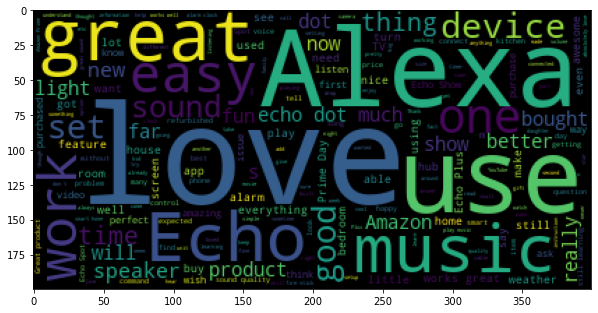

In [10]:
#positive review
good=df[df.feedback==1].verified_reviews.unique().tolist()
good=" ".join(good)
from wordcloud import WordCloud
cv=WordCloud().generate(good)
cv
plt.figure(figsize=(10,8))
plt.imshow(cv)

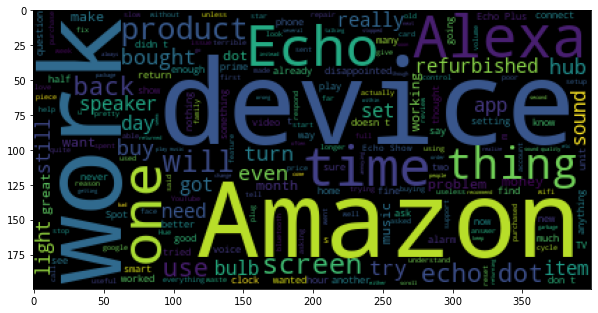

In [11]:
#Negative reviews
bad=df[df.feedback==0].verified_reviews.unique().tolist()
bad=" ".join(bad)
from wordcloud import WordCloud
cv=WordCloud().generate(bad)
cv
plt.figure(figsize=(10,8))
plt.imshow(cv)

In [12]:
#text preprocessing 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer

In [14]:
#data cleaning function create for clean the document
def clean_text(text):
    stop = stopwords.words('english') #stopwords list
    punc = list(punctuation) #punctuation list
    bad_tokens = stop + punc
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text) # tokenization
    word_tokens = [t for t in tokens if t.isalpha()] # removing numbers 
    # lemmatization,  stopwords & punctuation removal, to lower case
    clean_token = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    return " ".join(clean_token)

In [15]:
#call function 
df["verified_reviews"] = df["verified_reviews"].apply(clean_text)

In [16]:
df["verified_reviews"].head()

0                                            love echo
1                                                loved
2    sometimes playing game answer question correct...
3    i lot fun thing my yr old learns dinosaur cont...
4                                                music
Name: verified_reviews, dtype: object

In [18]:
#separate input and output from dataset
X = df['verified_reviews'] #input
Y = df["feedback"] #output

In [19]:
#train test split (70-30%  , 75-25% and 80%-20%)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [21]:
#no. of words in given senetence
sent_len=[] #user defined empty list declare
for sent in df['verified_reviews']:
    sent_len.append(len(word_tokenize(sent)))
#to add new column in existing dataset
df['sent_len'] = sent_len
df.head()

,Unnamed: 0,verified_reviews,feedback,sent_len
0,0,love echo,1,2
1,1,loved,1,1
2,2,sometimes playing game answer question correct...,1,18
3,3,i lot fun thing my yr old learns dinosaur cont...,1,21
4,4,music,1,1


In [22]:
max(sent_len)

276

In [23]:
np.quantile(sent_len,0.95)

47.0

In [41]:
max_len = 18

In [24]:
# Tokenization 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [25]:
# Tokenization
#create object of Tokenizer class
tok = Tokenizer(char_level=False,split=' ')

tok.fit_on_texts(x_train)

In [26]:
tok.index_word

{1: 'i',
 2: 'love',
 3: 'echo',
 4: 'great',
 5: 'alexa',
 6: 'work',
 7: 'music',
 8: 'it',
 9: 'like',
 10: 'use',
 11: 'sound',
 12: 'the',
 13: 'one',
 14: 'device',
 15: 'easy',
 16: 'dot',
 17: 'set',
 18: 'speaker',
 19: 'good',
 20: 'product',
 21: 'thing',
 22: 'get',
 23: 'amazon',
 24: 'play',
 25: 'time',
 26: 'would',
 27: 'home',
 28: 'still',
 29: 'we',
 30: 'really',
 31: 'light',
 32: 'show',
 33: 'prime',
 34: 'day',
 35: 'new',
 36: 'smart',
 37: 'also',
 38: 'this',
 39: 'bought',
 40: 'well',
 41: 'quality',
 42: 'better',
 43: 'much',
 44: 'room',
 45: 'need',
 46: 'fun',
 47: 'far',
 48: 'even',
 49: 'alarm',
 50: 'got',
 51: 'could',
 52: 'very',
 53: 'everything',
 54: 'plus',
 55: 'tv',
 56: 'able',
 57: 'so',
 58: 'make',
 59: 'video',
 60: 'learning',
 61: 'feature',
 62: 'turn',
 63: 'my',
 64: 'ask',
 65: 'house',
 66: 'screen',
 67: 'buy',
 68: 'weather',
 69: 'little',
 70: 'know',
 71: 'say',
 72: 'nice',
 73: 'clock',
 74: 'used',
 75: 'using',
 76: '

In [27]:
vocab_len = len(tok.index_word)
vocab_len

3170

In [37]:
sequences_train = tok.texts_to_sequences(x_train)
#texts_to_sequence() inbuilt function of Tokenizer class from keras library  each and every 
# sentences converted into a vector
sequences_train

[[19, 41, 4, 11, 41],
 [5, 833],
 [247, 7],
 [1988, 71, 319, 159, 17, 1989, 1381, 320, 42, 55, 232],
 [435],
 [2, 138, 143, 23, 611, 356],
 [26,
  146,
  51,
  62,
  21,
  131,
  66,
  1,
  236,
  307,
  76,
  23,
  690,
  226,
  1382,
  193,
  62,
  8,
  57,
  496,
  409,
  112,
  82,
  25,
  368,
  82,
  21,
  131],
 [2, 691, 6, 4],
 [1383],
 [1, 2, 74, 13, 9, 1990, 1120, 237, 410, 67, 33, 34],
 [1, 2],
 [8, 1121, 79, 466, 150, 29, 10, 392, 125, 34],
 [4, 20, 80, 567, 357, 369, 357, 1122, 1384, 756, 1123, 206],
 [15,
  17,
  10,
  1,
  39,
  108,
  13,
  65,
  13,
  216,
  162,
  1991,
  1,
  17,
  370,
  238,
  1992,
  135,
  436,
  34,
  4,
  56,
  82,
  1993],
 [12, 18, 11, 30, 19],
 [834,
  568,
  13,
  1,
  1124,
  569,
  692,
  963,
  129,
  159,
  8,
  26,
  1994,
  56,
  118,
  51,
  110,
  50,
  1385,
  612,
  613,
  288,
  437,
  411,
  5,
  95,
  757,
  1,
  371,
  1386,
  1995,
  338,
  25,
  964],
 [614, 56, 80, 109],
 [289, 524, 147, 183, 1996, 693, 32],
 [12, 132, 467]

In [42]:
#Now create a Sequential model means goes to neural network to train the model
from tensorflow.keras.models import Sequential

In [45]:
sequences_matrix_train = sequence.pad_sequences(sequences_train,maxlen=max_len)
sequences_matrix_train

array([[  0,   0,   0, ...,   4,  11,  41],
       [  0,   0,   0, ...,   0,   5, 833],
       [  0,   0,   0, ...,   0, 247,   7],
       ...,
       [  0,   0,   0, ..., 223,   4,  20],
       [  0,   0,   0, ...,   0,   0, 487],
       [  0,   0,   0, ...,   2,   3,  76]])

In [44]:
sequences_matrix_train[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 19, 41,  4, 11,
       41])

In [46]:
sequences_matrix_train[2]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 247,   7])

In [47]:
from tensorflow.keras.layers import Dense, Dropout,Embedding, SimpleRNN
#create the object of Sequential class
model = Sequential()
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
#second parameter=500 pass the output length
model.add(SimpleRNN(32,activation='tanh')) #tanh activation function use in sequential data (RNN)
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
# output layer
model.add(Dense(1,activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 18, 500)           1585500   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                17056     
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,603,645
Trainable params: 1,603,645
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [50]:
model.fit(sequences_matrix_train,y_train,batch_size=50,epochs=50)

Epoch 1/50
51/51 [==============================] - 4s 17ms/step - loss: 0.5384
Epoch 2/50
51/51 [==============================] - 1s 17ms/step - loss: 0.2263
Epoch 3/50
51/51 [==============================] - 1s 17ms/step - loss: 0.0752
Epoch 4/50
51/51 [==============================] - 1s 17ms/step - loss: 0.0401
Epoch 5/50
51/51 [==============================] - 1s 17ms/step - loss: 0.0287
Epoch 6/50
51/51 [==============================] - 1s 19ms/step - loss: 0.0232
Epoch 7/50
51/51 [==============================] - 1s 19ms/step - loss: 0.0197
Epoch 8/50
51/51 [==============================] - 1s 17ms/step - loss: 0.0188
Epoch 9/50
51/51 [==============================] - 1s 17ms/step - loss: 0.0180
Epoch 10/50
51/51 [==============================] - 1s 17ms/step - loss: 0.0190
Epoch 11/50
51/51 [==============================] - 1s 17ms/step - loss: 0.0199
Epoch 12/50
51/51 [==============================] - 1s 17ms/step - loss: 0.0191
Epoch 13/50
51/51 [==================

In [51]:
sequences_matrix_test = sequence.pad_sequences(tok.texts_to_sequences(x_test),maxlen=max_len)

In [52]:
sequences_matrix_test

array([[   0,    0,    0, ...,    5,  183,  499],
       [   1, 2062,  407, ...,    1, 1943,  725],
       [   1,  153,   26, ...,   32,  558,   77],
       ...,
       [ 781,   49,   73, ...,   34,  358,    1],
       [ 876,    4,    1, ...,  275,  399, 1149],
       [   0,    0,    0, ...,  487,  727,   33]])

In [53]:
sequences_matrix_test[1]

array([   1, 2062,  407,   25,   22,    1,   78,   12,   16, 1582,  426,
          1,   78,  105,  407,    1, 1943,  725])

In [54]:
y_pred=model.predict(sequences_matrix_test) #Y_pred=model.predict(x_test)
import numpy as np
print(np.round(y_pred,3))

[[1.   ]
 [0.942]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [0.907]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [0.999]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [0.999]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [0.999]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [0.   ]
 [1.   ]
 [1.   ]
 [0.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [0.001]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [0.025]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 

In [55]:
y_pred = np.where(y_pred>=0.5,1,0)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51        46
           1       0.96      0.98      0.97       584

    accuracy                           0.94       630
   macro avg       0.82      0.70      0.74       630
weighted avg       0.93      0.94      0.94       630



In [56]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 19  27]
 [  9 575]]


In [57]:
from tensorflow.keras.layers import Dense, Dropout,Embedding, SimpleRNN,LSTM
#create the object of Sequential class
model = Sequential()
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
#second parameter=500 pass the output length
#model.add(SimpleRNN(32,activation='tanh')) #tanh activation function use in sequential data (RNN)
model.add(LSTM(64,activation='tanh'))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
# output layer
model.add(Dense(1,activation='sigmoid'))

In [58]:
from tensorflow.keras.layers import Dense, Dropout,Embedding, SimpleRNN,LSTM,GRU
#create the object of Sequential class
model = Sequential()
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
#second parameter=500 pass the output length
#model.add(SimpleRNN(32,activation='tanh')) #tanh activation function use in sequential data (RNN)
#model.add(LSTM(64,activation='tanh'))
model.add(GRU(64,activation='tanh'))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
# output layer
model.add(Dense(1,activation='sigmoid'))